# LOAN APPROVAL PREDICTION PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the Dataset
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
#Explore the Dataset
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Overview:
    loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0      

In [4]:
# Handle Missing Values (if any)..

# Fill numerical columns with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [5]:
#Encode Categorical Variables

label_encoders = {}
categorical_columns = [' education', ' self_employed', ' loan_status']

# Ensure all categorical columns exist in the dataframe before encoding
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

for col in existing_categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display Unique Values Before and after Encoding
for col in existing_categorical_columns:
    print(f"\nColumn: {col}")
    print("Original Categories:", le.classes_)
    print("Encoded Values:", df[col].unique())


Column:  education
Original Categories: [' Approved' ' Rejected']
Encoded Values: [0 1]

Column:  self_employed
Original Categories: [' Approved' ' Rejected']
Encoded Values: [0 1]

Column:  loan_status
Original Categories: [' Approved' ' Rejected']
Encoded Values: [0 1]


In [6]:
# Define Features and Target

if 'loan_id' in df.columns and ' loan_status' in df.columns:
    X = df.drop(columns=['loan_id', ' loan_status'])  # Features
    y = df[' loan_status']  # Target

    print("Features (X) Shape:", X.shape)
    print("Target (y) Shape:", y.shape)
    print("\nFeatures Sample:\n", X.head())
    print("\nTarget Sample:\n", y.head())
else:
    print("Error: 'loan_id' or 'loan_status' column is missing in the dataset.")

Features (X) Shape: (4269, 11)
Target (y) Shape: (4269,)

Features Sample:
    no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   
2                 3          0              0       9100000     29700000   
3                 3          0              0       8200000     30700000   
4                 5          1              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                

In [7]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output verification
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

# Display a small sample
print("\nX_train Sample:\n", X_train.head())
print("\ny_train Sample:\n", y_train.head())

X_train Shape: (3415, 11)
X_test Shape: (854, 11)
y_train Shape: (3415,)
y_test Shape: (854,)

X_train Sample:
       no_of_dependents  education  self_employed  income_annum  loan_amount  \
1675                 5          1              0       7900000     29900000   
1164                 0          1              1       9600000     34000000   
192                  1          0              0        800000      2900000   
910                  2          0              1       4900000     13100000   
567                  5          0              1       3000000     11100000   

      loan_term  cibil_score  residential_assets_value  \
1675          6          568                   5800000   
1164         12          710                  23800000   
192           8          682                   2200000   
910          18          754                   8200000   
567          12          441                   8500000   

      commercial_assets_value  luxury_assets_value  bank_asset_v

In [8]:
# Standardize Numerical Features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Output verification
print("X_train (Standardized) Sample:\n", X_train[:5]) 
print("\nX_test (Standardized) Sample:\n", X_test[:5])

X_train (Standardized) Sample:
 [[ 1.51250774  1.00263891 -1.01504731  1.00950021  1.62477248 -0.86000338
  -0.18740061 -0.25538429  2.04678575  0.07808278  1.16041374]
 [-1.43500078  1.00263891  0.98517575  1.61417128  2.07712843  0.1888936
   0.63739678  2.49569299  1.22311091  2.49843196  0.88201987]
 [-0.84549907 -0.99736803 -1.01504731 -1.51589075 -1.35415691 -0.51037106
   0.47476068 -0.80559975 -0.8818359  -1.33923881 -1.31419838]
 [-0.25599737 -0.99736803  0.98517575 -0.05756639 -0.22878359  1.23779058
   0.8929678   0.11142601 -0.37847906  0.14349763  0.69642396]
 [ 1.51250774 -0.99736803  0.98517575 -0.73337524 -0.44944502  0.1888936
  -0.92507151  0.1572773  -0.56151791 -0.85952996 -0.91207391]]

X_test (Standardized) Sample:
 [[ 1.51250774 -0.99736803 -1.01504731  0.12027804  0.49939915  1.58742291
  -1.02962329 -0.14839795  1.15447134  0.05627784  0.72735662]
 [-0.25599737 -0.99736803 -1.01504731  0.29812247 -0.12948594 -0.51037106
  -0.00733921 -0.42350568  1.04007205  0.

In [9]:
# Train a Random Forest Classifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Output verification
print("Random Forest Classifier trained successfully!")
print("Feature Importances:\n", clf.feature_importances_)

Random Forest Classifier trained successfully!
Feature Importances:
 [0.0083849  0.00209286 0.00247253 0.01805981 0.02893791 0.06449888
 0.80993871 0.01816812 0.01444026 0.01774535 0.01526068]


In [10]:
# Make Predictions

y_pred = clf.predict(X_test)

# Output Verification
print("Predictions for first 10 test samples:")
print(y_pred[:10])

Predictions for first 10 test samples:
[1 0 1 0 0 0 0 1 0 1]


In [11]:
#Evaluate the Model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.977751756440281

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854


Confusion Matrix:
 [[529   7]
 [ 12 306]]


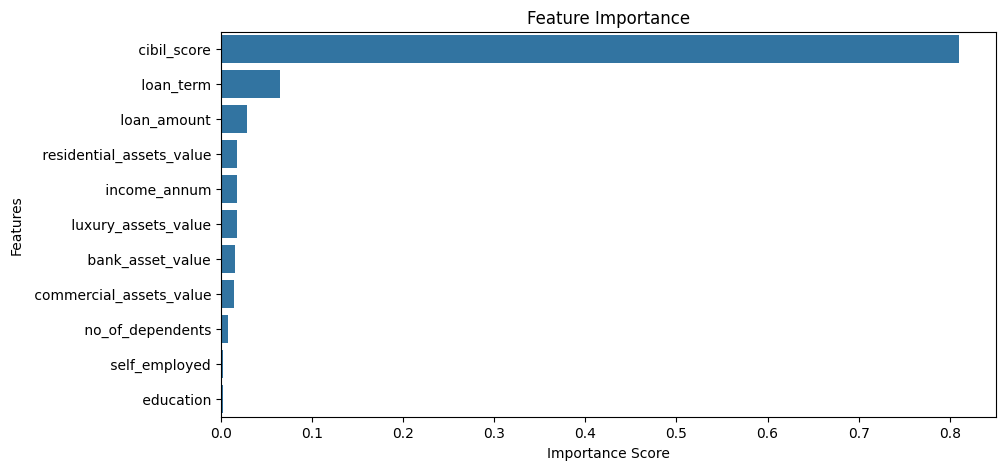

In [13]:
# Feature Importance

feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)

# Labels and Title
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")

plt.show()